## Importación de bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Opciones de graficación
Estética de las gráficas

In [2]:
sns.set_style("darkgrid")                  
sns.set_context("paper", font_scale = 1.6)  # Tamaño de fuente en el contexto de un "paper"

In [3]:
def graficar_simple(experimento, sentido):
    global t_pasos, promedio
    tiempo = t_pasos
    x_marcas = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    etiqueta_tiempo = "$\\nu$"
    etiquetas_sentido = {"xy" : "$\\langle \\mathcal{T}_{X \\rightarrow Y} \\rangle$",
                         "yx" : "$\\langle \\mathcal{T}_{Y \\rightarrow X} \\rangle$"}
    plt.figure(figsize = (20, 6))
    plt.plot(tiempo, promedio[experimento][sentido], "o--")
    plt.xlim(tiempo.min(), tiempo.max())
    plt.xticks(x_marcas)
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText = True)
    plt.xlabel(etiqueta_tiempo)
    plt.ylabel(etiquetas_sentido[sentido])
    plt.savefig("graficas/entropia_validacion/" + experimento + "_" + sentido + ".pdf", bbox_inches = "tight")
    plt.show()    

In [4]:
def graficar_diferencia(experimento, diferencia, por_pasos = True):
    global t_pasos, promedio
    tiempo = t_pasos
    x_marcas = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    etiqueta_tiempo = "$\\nu$"
    etiquetas_sentido = {"xy-yx" : "$\\langle \\mathcal{T}_{X \\rightarrow Y} - \\mathcal{T}_{Y \\rightarrow X} \\rangle$",
                         "yx-xy" : "$\\langle \\mathcal{T}_{Y \\rightarrow X} - \\mathcal{T}_{X \\rightarrow Y} \\rangle$"}
    plt.figure(figsize = (20, 6))
    plt.plot(tiempo, promedio_diferencias[experimento][diferencia], "o--")
    if experimento == "00":
        plt.axhline(promedio_diferencias[experimento][diferencia].mean(), c = "black")
    plt.xlim(tiempo.min(), tiempo.max())
    plt.xticks(x_marcas)
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText = True)
    plt.xlabel(etiqueta_tiempo)
    plt.ylabel(etiquetas_sentido[diferencia])
    plt.savefig("graficas/entropia_validacion/" + experimento + "_" + diferencia + ".pdf", bbox_inches = "tight")
    plt.show()    

## Lista de archivos

In [5]:
ruta = "datos/caracter_entropia_validacion/"

## Tiempo

In [6]:
t = np.loadtxt("datos/base/tiempo_ets.csv")
t_pasos = np.loadtxt("datos/base/pasos_ets.csv")

## Inicialización de "metadatos"

In [7]:
sentidos = ["xy", "yx"]
diferencias = ["xy-yx", "yx-xy"]
experimentos = ["00", "01", "02", "03", "04", "05"]

## Inicialización de diccionarios

In [8]:
error = {}
promedio = {}

error_diferencias = {}
promedio_diferencias = {}

## Lectura y organización de datos respecto a sus "metadatos"

In [9]:
for ex in experimentos:
    error[ex] = {}
    promedio[ex] = {}
    for sen in sentidos:
        error[ex][sen] = np.loadtxt(ruta + "error_" + ex + "_" + sen + ".csv")
        promedio[ex][sen] = np.loadtxt(ruta + "promedio_" + ex + "_" + sen + ".csv")
    
    error_diferencias[ex] = {}
    promedio_diferencias[ex] = {}
    for dif in diferencias:
        error_diferencias[ex][dif] = np.loadtxt(ruta + "error_" + ex + "_" + dif + ".csv")
        promedio_diferencias[ex][dif] = np.loadtxt(ruta + "promedio_" + ex + "_" + dif + ".csv")

## Proceso de graficación

Experimento:  00
Sentido:  xy


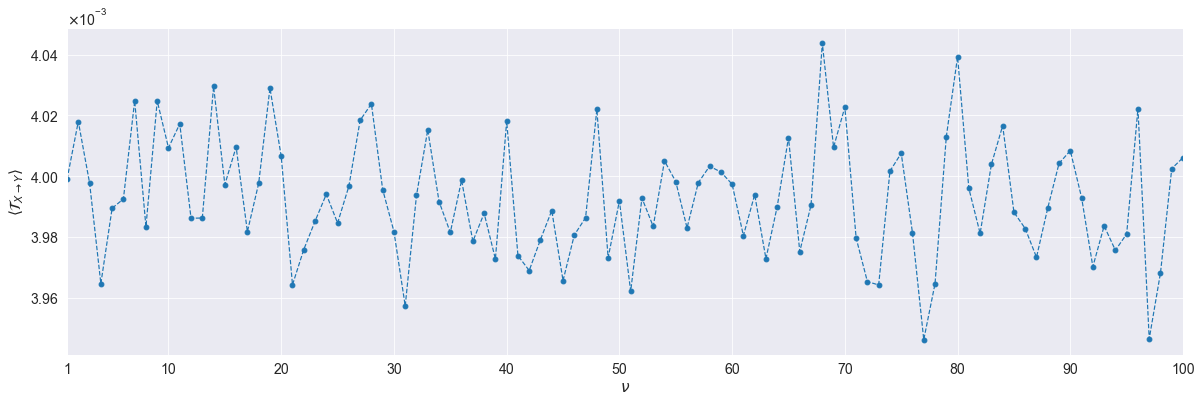

Experimento:  00
Sentido:  yx


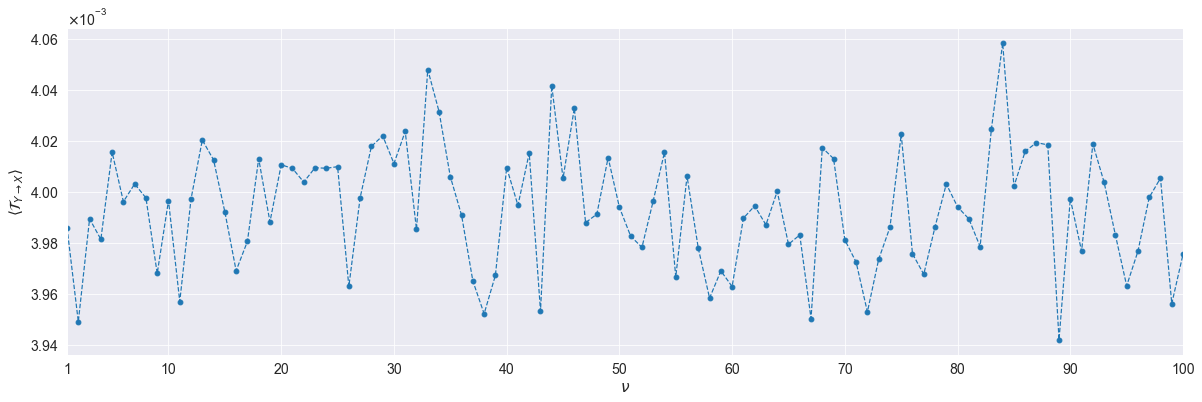

Experimento:  00
Diferencia:  xy-yx


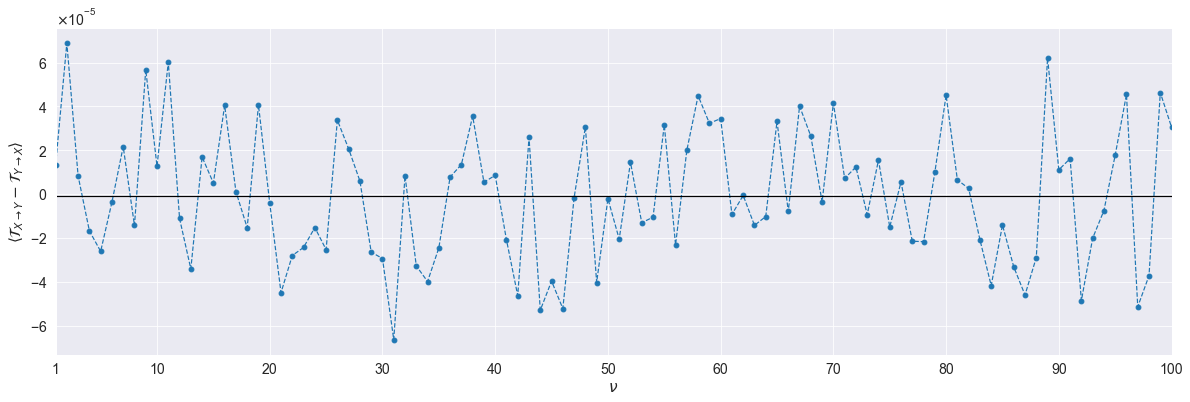

Experimento:  00
Diferencia:  yx-xy


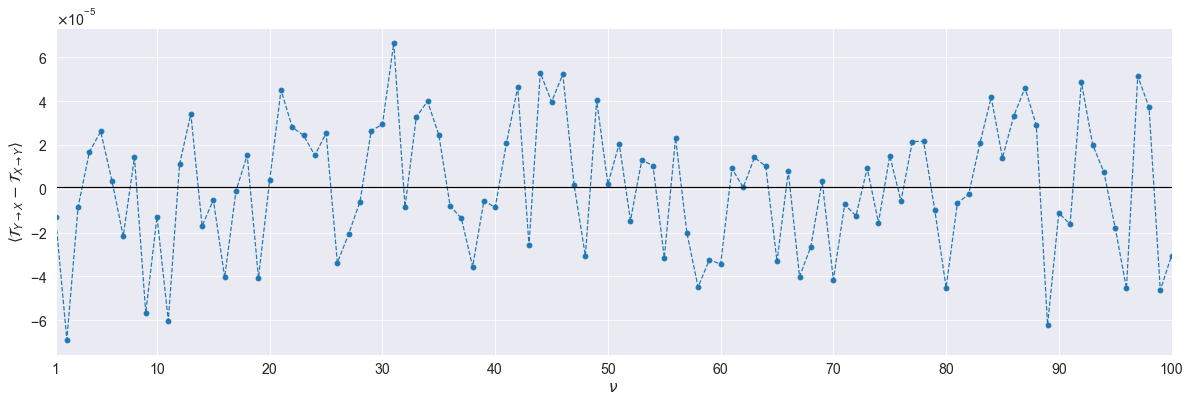

Experimento:  01
Sentido:  xy


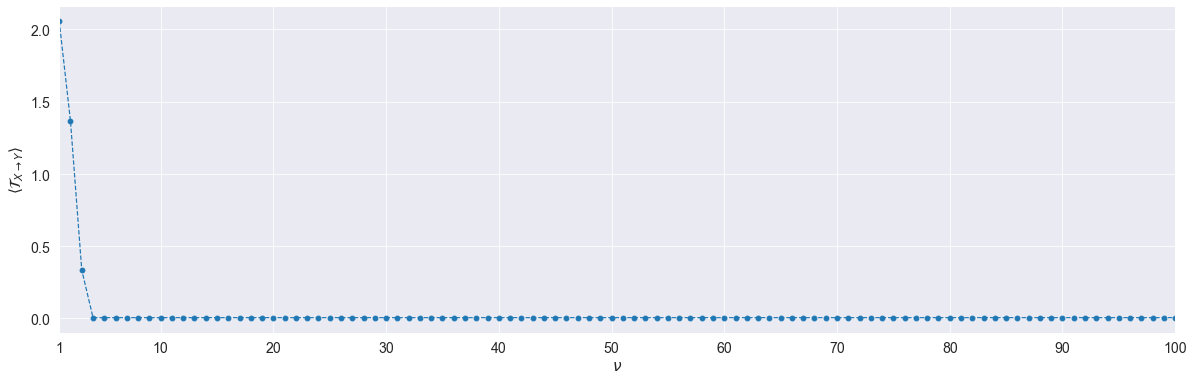

Experimento:  01
Sentido:  yx


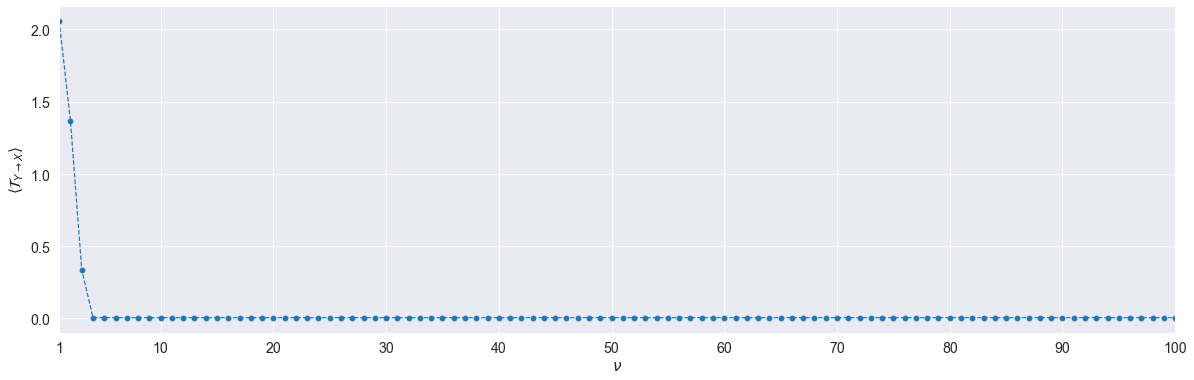

Experimento:  01
Diferencia:  xy-yx


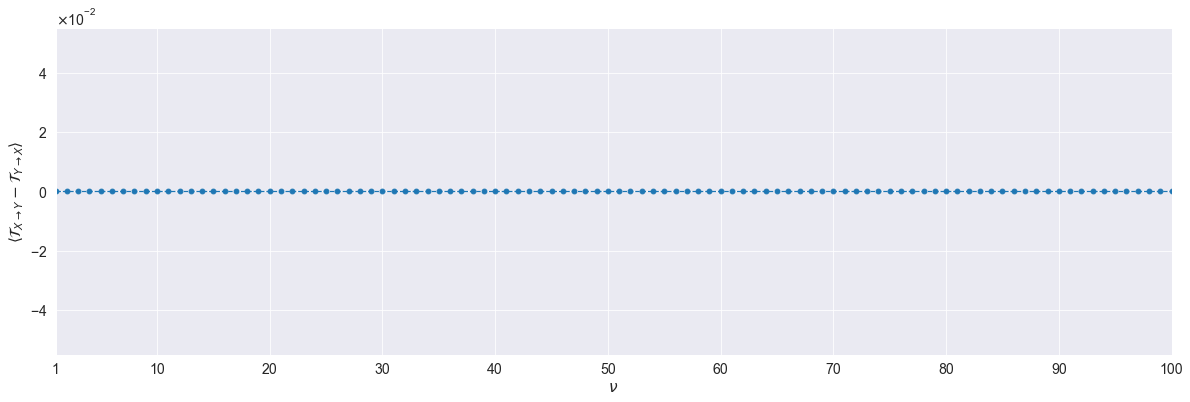

Experimento:  01
Diferencia:  yx-xy


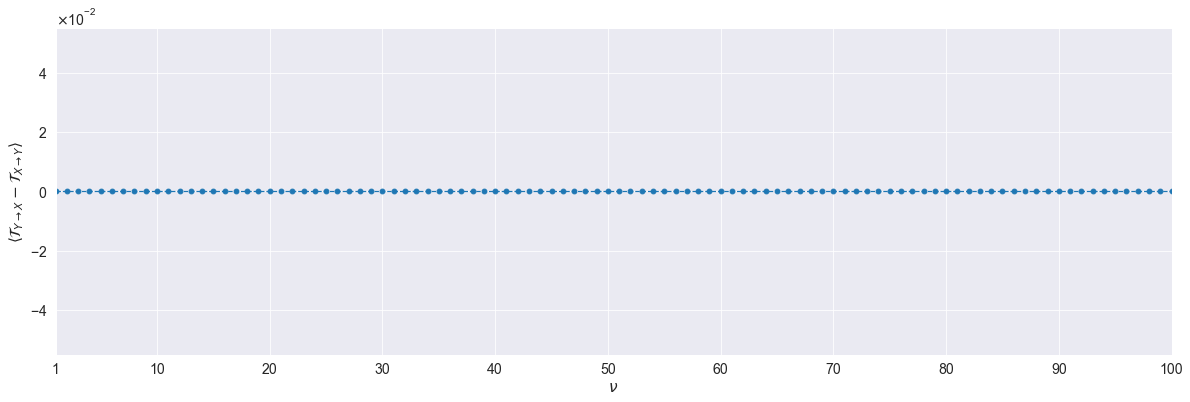

Experimento:  02
Sentido:  xy


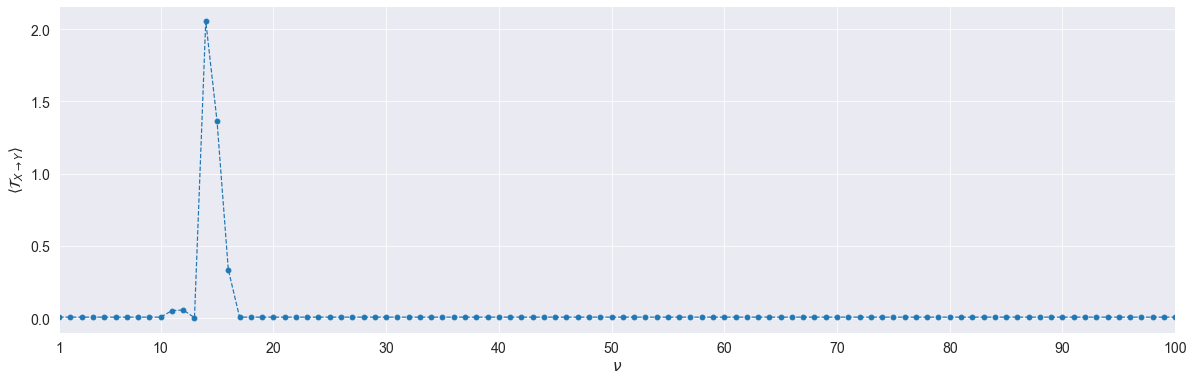

Experimento:  02
Sentido:  yx


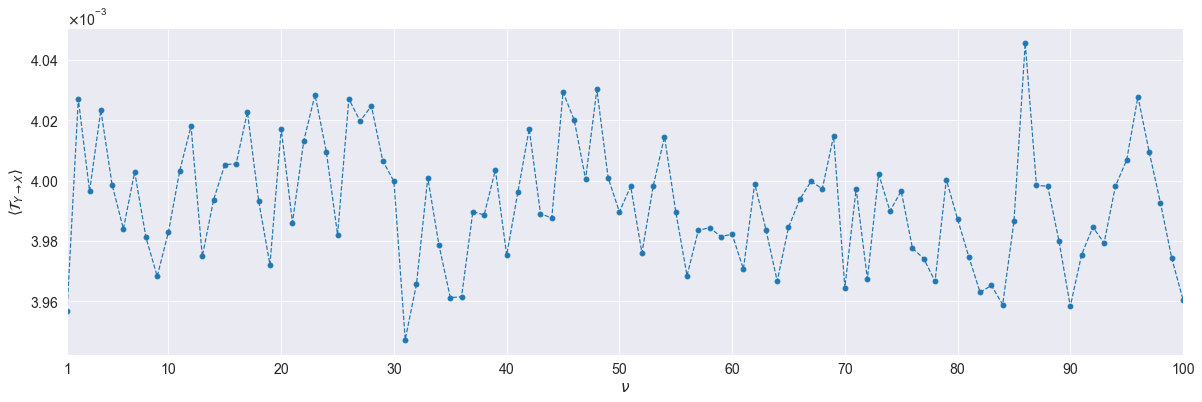

Experimento:  02
Diferencia:  xy-yx


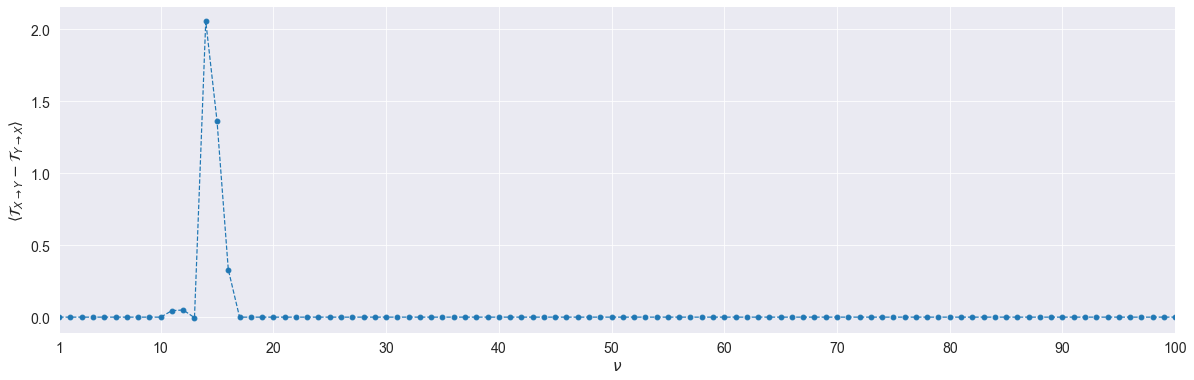

Experimento:  02
Diferencia:  yx-xy


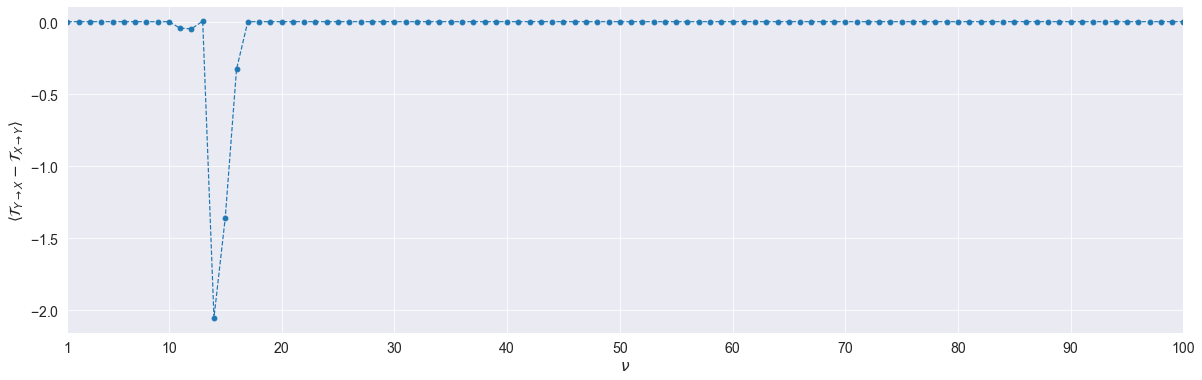

Experimento:  03
Sentido:  xy


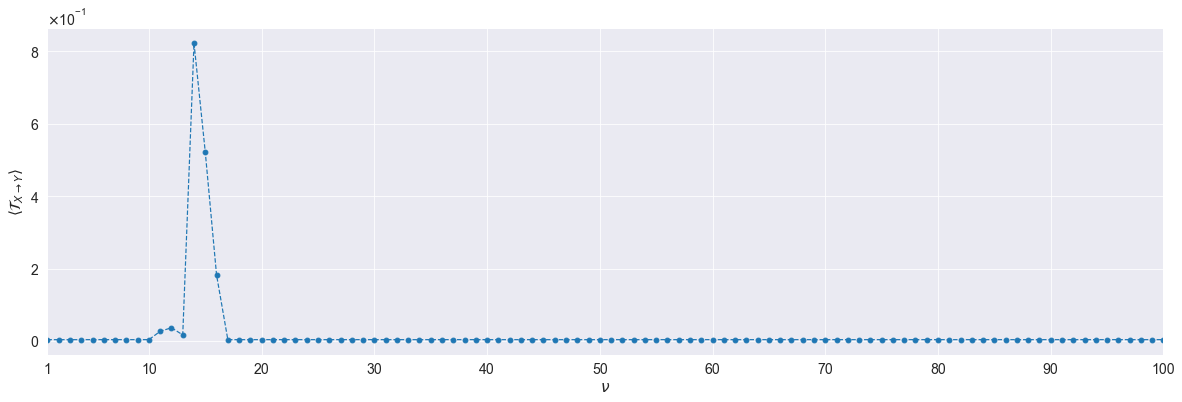

Experimento:  03
Sentido:  yx


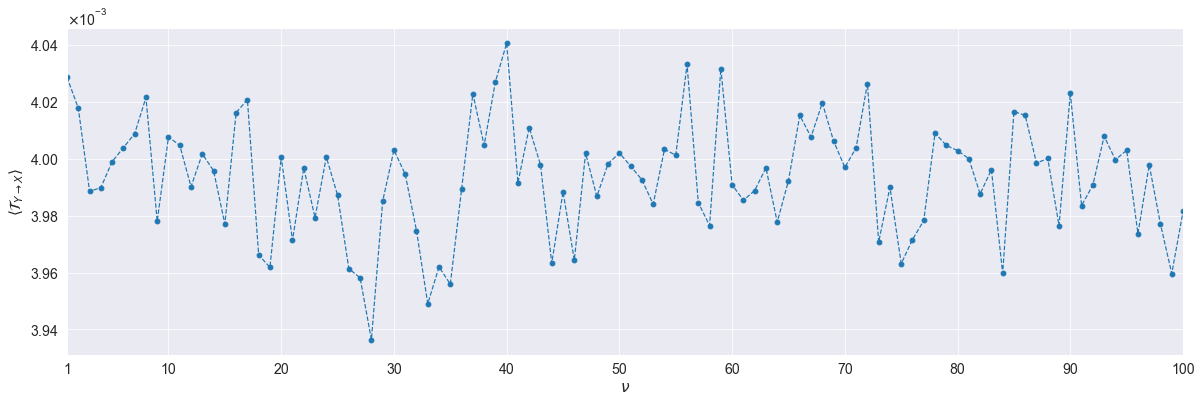

Experimento:  03
Diferencia:  xy-yx


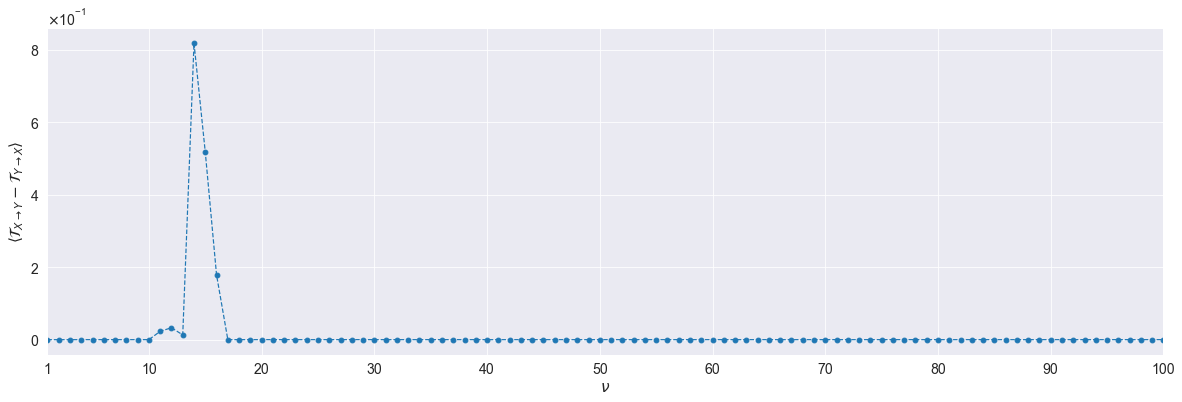

Experimento:  03
Diferencia:  yx-xy


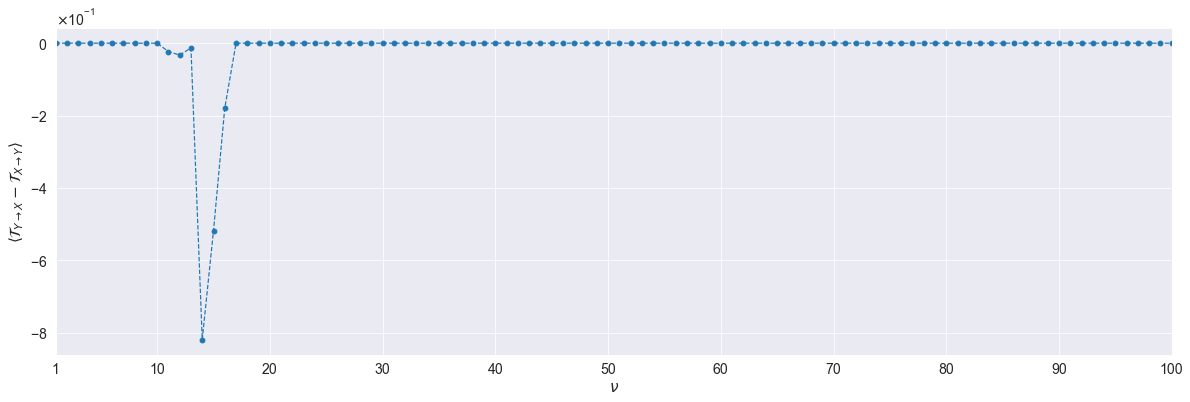

Experimento:  04
Sentido:  xy


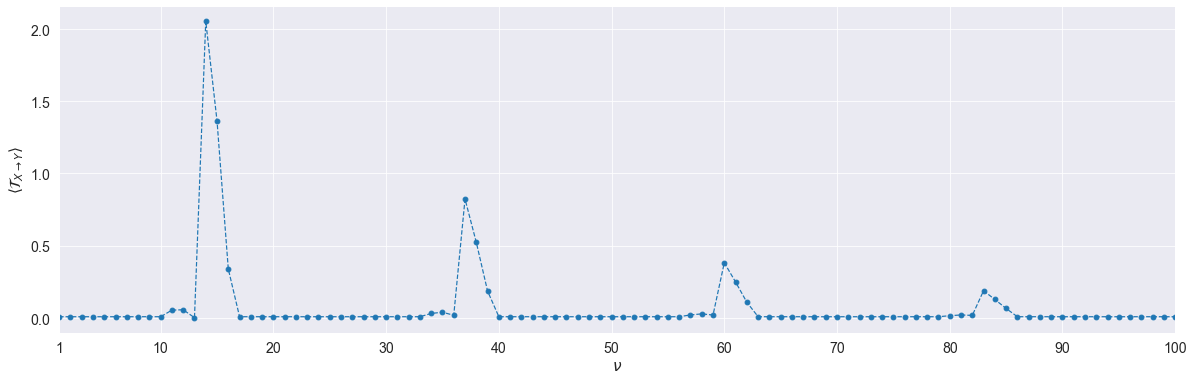

Experimento:  04
Sentido:  yx


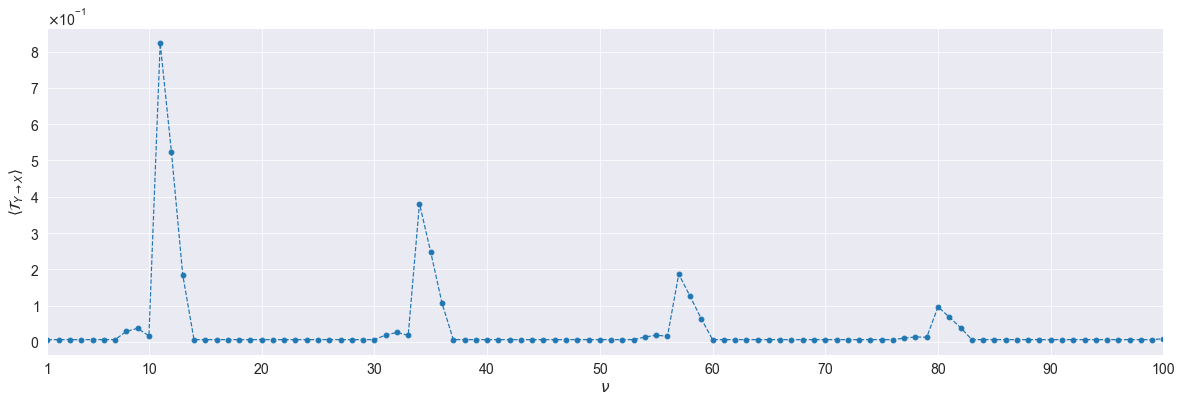

Experimento:  04
Diferencia:  xy-yx


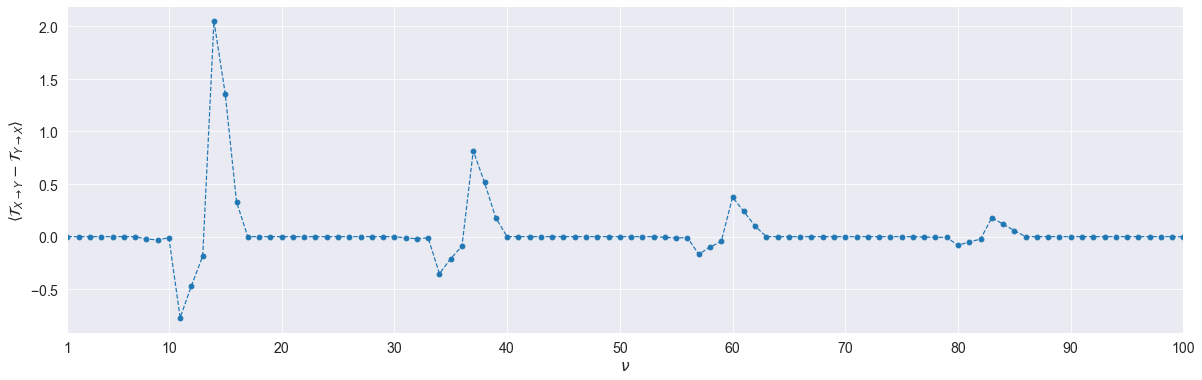

Experimento:  04
Diferencia:  yx-xy


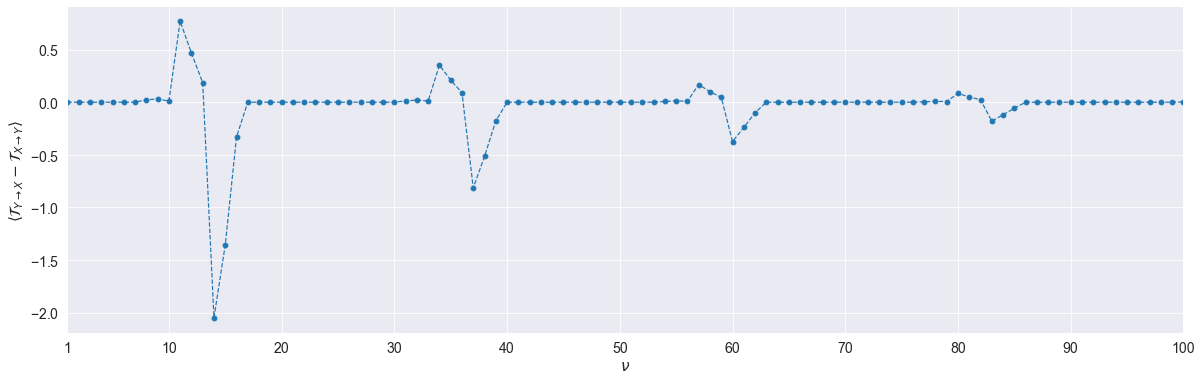

Experimento:  05
Sentido:  xy


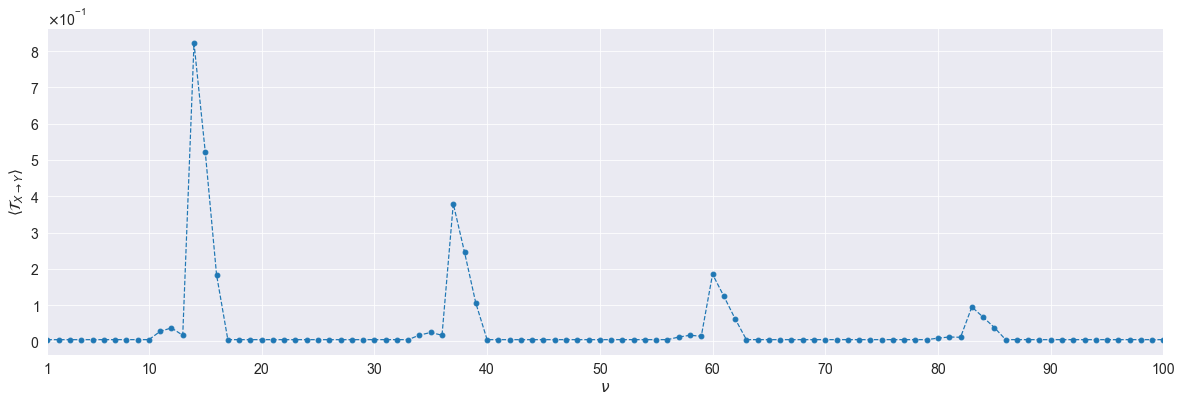

Experimento:  05
Sentido:  yx


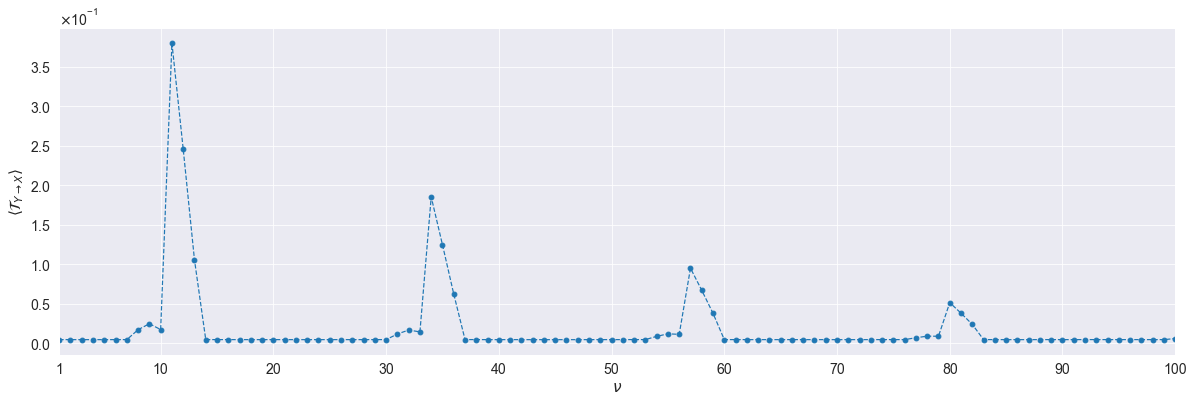

Experimento:  05
Diferencia:  xy-yx


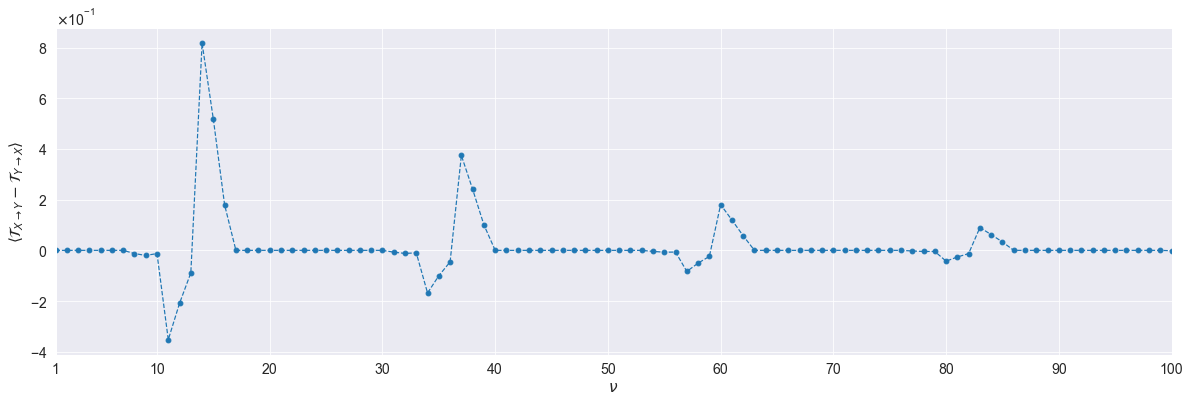

Experimento:  05
Diferencia:  yx-xy


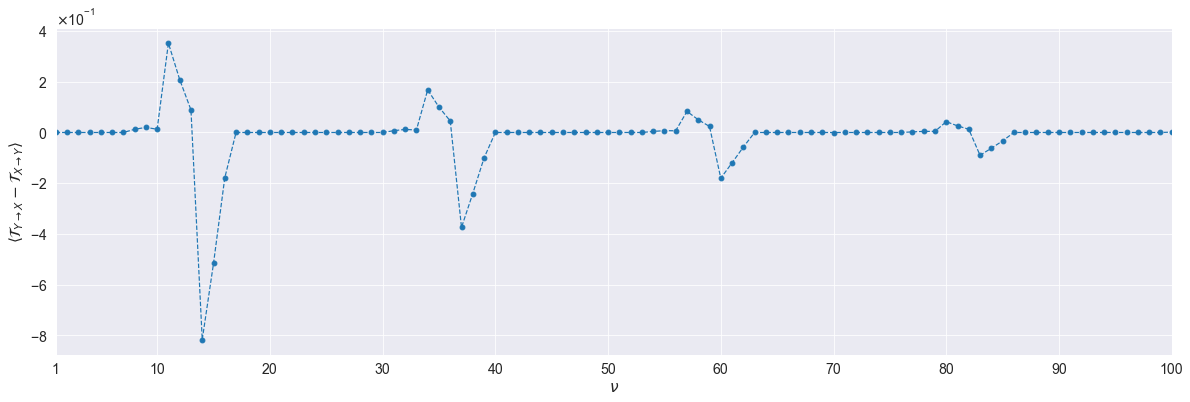

In [10]:
for exp in experimentos:
    for sen in sentidos:
        print("Experimento: ", exp)
        print("Sentido: ", sen)
        graficar_simple(exp, sen)
    for dif in diferencias:
        print("Experimento: ", exp)
        print("Diferencia: ", dif)
        graficar_diferencia(exp, dif)